In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
from datetime import datetime

# Get Rodrigo's data set, recorded at ICTP
total = pd.read_csv('TS_60917.csv') 
total.index = pd.DatetimeIndex(total['created_at'])

# Just use a short sequence at year's end
df=total[datetime(2016, 12, 29, 0, 0, 0):datetime(2016, 12, 31, 23, 59, 59)]

# and use only data points at every minute
df=df.resample('T').median()

# Prophet requires the independent variable called "ds"
df['ds'] = df.index

# and the dependent variable called "y"
df['y'] = df['Temperature']

# Create a Prophet model, fit to the data
model=Prophet()
model.fit(df)

# Set the prediction period to 6 hours = 6*60 minutes
future=model.make_future_dataframe(periods=6*60,freq='T')
future.tail()

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/Users/markon/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds
4675,2017-01-01 05:55:00
4676,2017-01-01 05:56:00
4677,2017-01-01 05:57:00
4678,2017-01-01 05:58:00
4679,2017-01-01 05:59:00


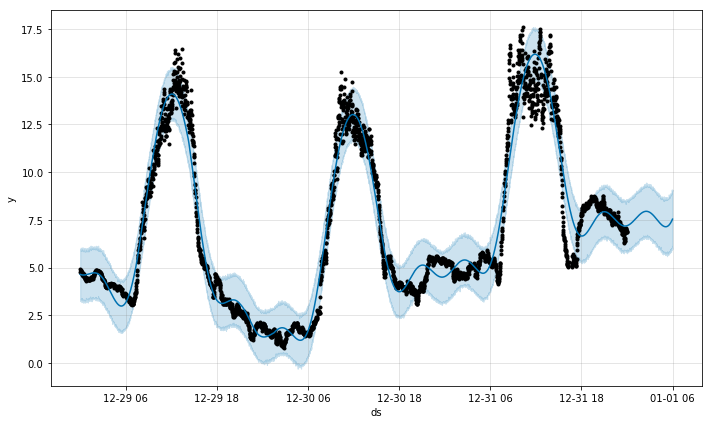

In [2]:
forecast=model.predict(future)
model.plot(forecast)

In [3]:

# Set the prediction period to 6 hours = 6*60 minutes
future2=model.make_future_dataframe(periods=24*60,freq='T')
future2.tail()

,ds
5755,2017-01-01 23:55:00
5756,2017-01-01 23:56:00
5757,2017-01-01 23:57:00
5758,2017-01-01 23:58:00
5759,2017-01-01 23:59:00


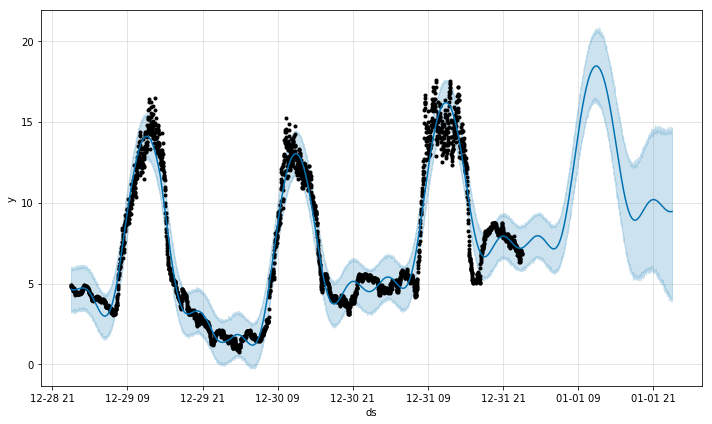

In [4]:
forecast=model.predict(future2)
model.plot(forecast)